# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Откройте файл с данными и изучите общую информацию. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

sns.set(rc={'figure.figsize':(10,7)})

In [2]:
data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [3]:
display(data.head(30))
pd.set_option('display.max_columns', None)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


Для начала приведем все названия столбцов к одному виду.

In [4]:
data = data.rename(columns={'cityCenters_nearest': 'city_centers_nearest', 'parks_around3000': 'parks_around_3000', 'ponds_around3000': 'ponds_around_3000'})
data.head() # проверка

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,False,False,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,False,False,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,False,False,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,False,False,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b> 
<br>Молодец! Так датафрейм будет более аккуратным
</div>

Необходимо изменить тип данных в столбцах:

last_price на int64

first_day_exposition на datetime

floors_total на int64

is_apartment на bool

balcony на int64

parks_around_3000 на int64

ponds_around_3000 на int64

days_exposition на int64

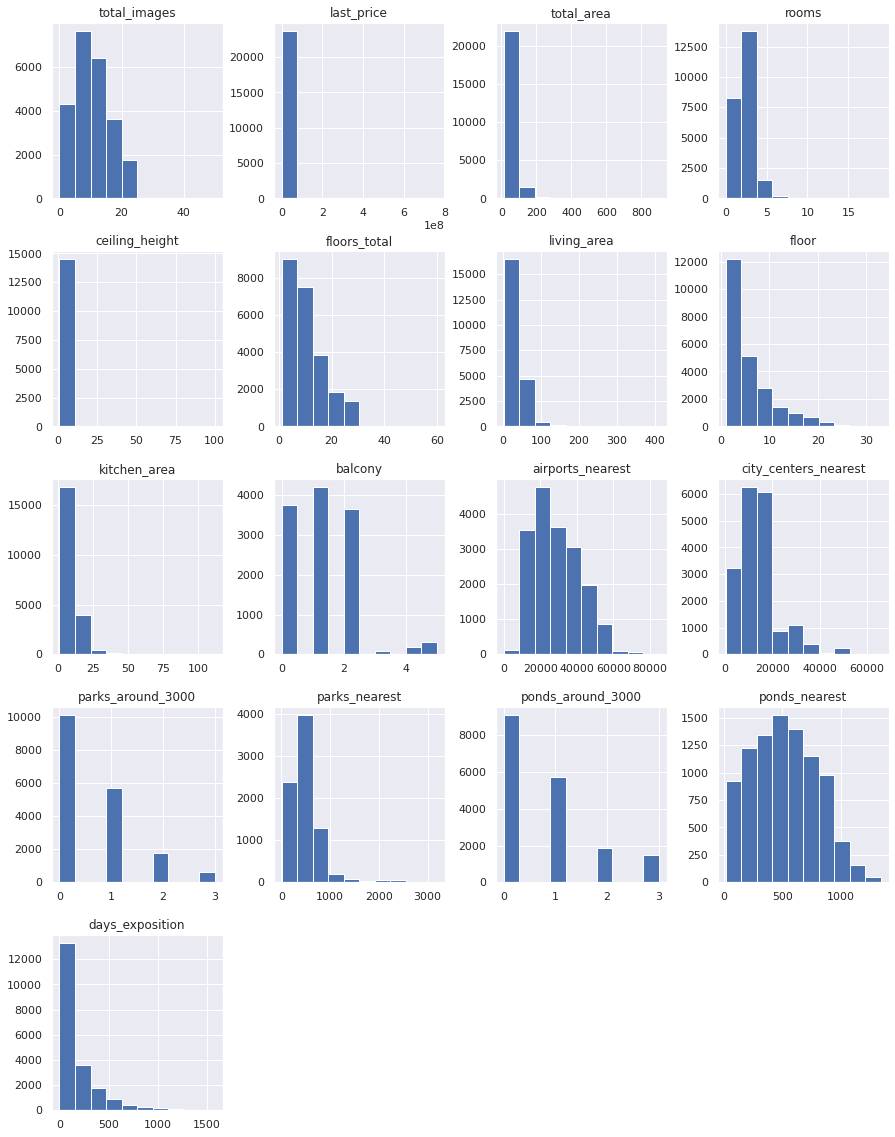

In [5]:
data.hist(figsize=(15, 20))
plt.show()

### Предобработка данных

In [6]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
city_centers_nearest     5519
parks_around_3000        5518
parks_nearest           15620
ponds_around_3000        5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

Пропуски отсутствуют лишь в столбцах total_images, last_price, total_area, first_day_exposition, rooms, floor, studio и open_plan. 

In [7]:
data['is_apartment'].value_counts(dropna=False) # изучим подробнее столбец is_apartment

NaN      20924
False     2725
True        50
Name: is_apartment, dtype: int64

Данный столбец - это булев массив, то есть он говорит нам о том, является ли данная квартира апартаментами или нет (апартаменты не являются жилым помещением). В Санкт-Петербурге апартаменты встречаются довольно часто, но квартиры более частое явление. Вероятно пропуски обусловлены тем, что пользователи не до конца заполнили данные о квартире. Удалить строки с пропусками в данном столбце нельзя, они составляют большую часть от общего числа данных. Считаю, что пропуски следует заменить на значение False, так как квартир продают в целом больше. 

In [8]:
data['is_apartment'] = data['is_apartment'].fillna(False) # заменяем пропуски на False
data['is_apartment'].isna().sum() # проверяем замену

0

In [9]:
data['balcony'].value_counts(dropna=False) # изучим подробнее столбец balcony

NaN    11519
1.0     4195
0.0     3758
2.0     3659
5.0      304
4.0      183
3.0       81
Name: balcony, dtype: int64

Данный столбец говорит нам о наличии и количестве балконов в квартире. Думаю, что в данном случае также были не до конца заполнены данные о квартире и в данных квартирах балкон просто отсутствует. Заменим пропуски в столбце на 0.

In [10]:
data['balcony'] = data['balcony'].fillna(0) # заменяем пропуски на 0
data['balcony'].isna().sum() # проверяем замену

0

In [11]:
data['ceiling_height'].value_counts(dropna=False) # изучим подробнее столбец ceiling_height

NaN     9195
2.50    3515
2.60    1646
2.70    1574
3.00    1112
        ... 
4.06       1
3.68       1
1.75       1
5.00       1
4.65       1
Name: ceiling_height, Length: 184, dtype: int64

Данный столбец говорит нам о высоте потолков в квартире. Откинуть строки с пропущенными значениями нельзя, так как слишком большой процент данных отсеится. Заменим пропуски медианным значением.

In [12]:
data.loc[data['ceiling_height'].isna(), 'ceiling_height'] = data['ceiling_height'].median()
data['ceiling_height'].isna().sum()

0

In [13]:
# Заполним пропуски по удаленности от центра медианным значением относительно населенных пунктов
for local in data['locality_name'].unique():
    med = data.loc[data['locality_name'] == local, 'city_centers_nearest'].median()
    data.loc[(data['city_centers_nearest'].isna()) & (data['locality_name'] == local), 'city_centers_nearest'].median()

data.loc[data['city_centers_nearest'].isna(), 'city_centers_nearest'] = data['city_centers_nearest'].median()

/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/p

Работа с отальными пропусками

- Столбцы living_area и kitchen_area важны для дальнейшего анализа. Процент пропусков там не велик, поэтому пропуски оставляем.

- В столбце floors_total всего 86 пропусков, которые на исследование не повлияют. Оставим пропуски.

- Пропуски в столбце с высотой потолков также оставляем.

- locality_name содержит 49 пропусков. Так как пропусков мало и на исследование они не повлияют, то оставим их.

- Пропуски в столбцах parks_around_3000, parks_nearest, ponds_around_3000, parks_around_3000, ponds_nearest и airports_nearest связаны с картографическими данными. Возможно, эти данные должны были считаться автоматически по карте. Думаю, что пропуски связаны с технической ошибкой, но эти данные не повлияют на исследование. Оставляем пропуски, так как восстановить их с достаточной точностью никак.

- В столбце days_exposition 3181 пропусков. Эти объявления не содержат информации о количестве дней размещения объявления. Думаю, что эти данные должны быть получены автоматически. Возможно, это также техническая ошибка, которая могла произойти в момент сбора/выгрузки данных. Данные этого столбца важны для исследования, оставляем пропуски.

Изначально мы выделили столбцы, в которых нужно преобразовать тип данных в другой. В ходе обработки пропусков мы выявили, что некоторые пропуски убрать не получится, а, соответственно, и преобразовать в другой тип. Для этих случаев оставим так, как было.

In [14]:
# преобразуем тип данных
data['last_price'] = data['last_price'].astype(int)
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')
data['is_apartment'] = data['is_apartment'].astype('boolean')
data['balcony'] = data['balcony'].astype(int)
data.dtypes # проверяем

total_images                     int64
last_price                       int64
total_area                     float64
first_day_exposition    datetime64[ns]
rooms                            int64
ceiling_height                 float64
floors_total                   float64
living_area                    float64
floor                            int64
is_apartment                   boolean
studio                            bool
open_plan                         bool
kitchen_area                   float64
balcony                          int64
locality_name                   object
airports_nearest               float64
city_centers_nearest           float64
parks_around_3000              float64
parks_nearest                  float64
ponds_around_3000              float64
ponds_nearest                  float64
days_exposition                float64
dtype: object

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b> 
<br>Изменение типов данных проведено верно. Можно ещё заменить тип данных с float64 на float32 для экономии памяти.
</div>

#### Обработка дубликатов

In [15]:
data.duplicated().sum() # проверим на наличие явных дубликатов

0

Явные дубликаты отсутствуют.

##### Неявные дубликаты

In [16]:
data['locality_name'].sort_values().unique() # уникальные значения столбца locality_name

array(['Бокситогорск', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг',
       'Высоцк', 'Гатчина', 'Зеленогорск', 'Ивангород', 'Каменногорск',
       'Кингисепп', 'Кириши', 'Кировск', 'Колпино', 'Коммунар',
       'Красное Село', 'Кронштадт', 'Кудрово', 'Лодейное Поле',
       'Ломоносов', 'Луга', 'Любань', 'Мурино', 'Никольское',
       'Новая Ладога', 'Отрадное', 'Павловск', 'Петергоф', 'Пикалёво',
       'Подпорожье', 'Приморск', 'Приозерск', 'Пушкин', 'Санкт-Петербург',
       'Светогорск', 'Сертолово', 'Сестрорецк', 'Сланцы', 'Сосновый Бор',
       'Сясьстрой', 'Тихвин', 'Тосно', 'Шлиссельбург',
       'городской поселок Большая Ижора', 'городской поселок Янино-1',
       'городской посёлок Будогощь', 'городской посёлок Виллози',
       'городской посёлок Лесогорский', 'городской посёлок Мга',
       'городской посёлок Назия', 'городской посёлок Новоселье',
       'городской посёлок Павлово', 'городской посёлок Рощино',
       'городской посёлок Свирьстрой', 'городской посёлок Совет

In [17]:
data['locality_name'] = data['locality_name'].str.replace('ё','е') # меняем ё на е, чтобы не было дубликатов из слов поселок и посёлок

In [18]:
data = data.replace({'locality_name':{'Никольское': 'село Никольское', 'городской посёлок Советский': 'посёлок городского типа Советский', 'городской посёлок Большая Ижора': 'посёлок городского типа Большая Ижора', 'городской посёлок Лесогорский': 'посёлок городского типа Лесогорский', 'посёлок Рябово': 'посёлок городского типа Рябово', 'городской посёлок Мга': 'посёлок городского типа Мга', 'городской посёлок Павлово': 'посёлок городского типа Павлово', 'городской посёлок Назия': 'посёлок городского типа Назия', 'коттеджный посёлок Лесное': 'посёлок Лесное', 'Мурино': 'посёлок Мурино', 'Любань': 'посёлок Любань', 'городской посёлок Рощино': 'посёлок городского типа Рощино', 'деревня Кудрово': 'Кудрово'}})
# избавляемся от дубликатов в названиях поселений

In [19]:
data = data.dropna(subset=['locality_name']) # удаляем строки, где населенный пункт не указан
data['locality_name'].isna().sum() # проверяем

0

##### Работа с выбросами (аномальными значениями)

In [20]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
total_images,23650.0,9.862326e+00,5.682278e+00,0.0,6.00,9.00,14.0,50.0
last_price,23650.0,6.541127e+06,1.089640e+07,12190.0,3400000.00,4650000.00,6799000.0,763000000.0
total_area,23650.0,6.032907e+01,3.566181e+01,12.0,40.00,52.00,69.7,900.0
rooms,23650.0,2.070106e+00,1.078620e+00,0.0,1.00,2.00,3.0,19.0
ceiling_height,23650.0,2.724311e+00,9.892549e-01,1.0,2.60,2.65,2.7,100.0
floors_total,23565.0,1.067588e+01,6.594823e+00,1.0,5.00,9.00,16.0,60.0
living_area,21752.0,3.444836e+01,2.203766e+01,2.0,18.60,30.00,42.3,409.7
floor,23650.0,5.893277e+00,4.883317e+00,1.0,2.00,4.00,8.0,33.0
kitchen_area,21381.0,1.056640e+01,5.901753e+00,1.3,7.00,9.10,12.0,112.0
balcony,23650.0,5.917125e-01,9.596620e-01,0.0,0.00,0.00,1.0,5.0


В столбце ceiling_height максимальное 100 Это выбросы. Вероятно те, кто указал высоту потолков больше 20, опечатались. Такие значения надо поделить на 10.

In [21]:
data.loc[data['ceiling_height'] >= 20, 'ceiling_height'] = data['ceiling_height'] / 10
data['ceiling_height'].describe().T # проверяем

count    23650.000000
mean         2.698620
std          0.253201
min          1.000000
25%          2.600000
50%          2.650000
75%          2.700000
max         14.000000
Name: ceiling_height, dtype: float64

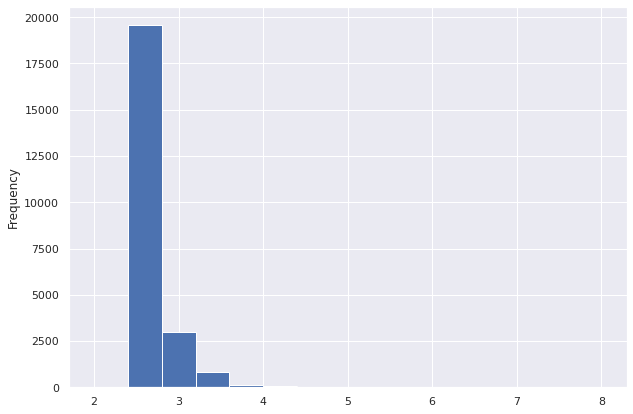

In [22]:
data['ceiling_height'].sort_values().plot(y = 'ceiling_height', kind = 'hist', bins = 15, range=(2,8))
plt.show()

Квартиры с высотой потолков ниже 2.5 и выше 2.8 - выбросы. Но в СПб есть квартиры с высокими потолками. Оставим выcоту потолков от 2.5 до 8 м (в элитных домах высота потолков может быть действительно большой, особенно, если присутствует второй свет).

In [23]:
data = data.query('2.5 <= ceiling_height <= 8', engine='python')

В СПб максимальная высота жилого дома равна 37 этажам. Строки со значением в столбце floors_total больше 37 отсеиваем.

In [24]:
data = data.query('floors_total <= 37 or floors_total.isna()', engine='python')
data['floors_total'].max() # проверяем

36.0

В столбце last_price минимаьлное значение 12190. Явно выброс. За такую стоимость купить квартиру в СПб нереально.
Я думаю, продавец не дописал три ноля после. Умножим все значения ниже 1000000 на 1000.

<AxesSubplot:>

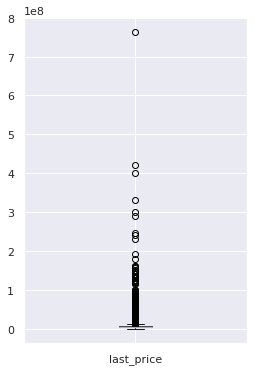

In [25]:
data.boxplot(column='last_price', grid=True, figsize=(4, 6)) # построим график размаха

Значения более 150 млн редкие, их можно выкинуть. Также отбросим значение ниже 2 млн, так как ниже этой стоимости купить квартиру в СПб нереально.

In [26]:
data = data.query('2000000 <= last_price <= 150000000').reset_index(drop=True)

Далее проанализируем столбец total_area. Построим график размаха.

<AxesSubplot:>

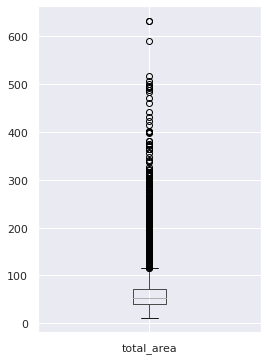

In [27]:
data.boxplot(column='total_area', grid=True, figsize=(4, 6))

Отбросим квартиры с площадью более 500 кв м, так как они редкие, но могут сильно повлиять на окончательный результат.

In [28]:
data = data.query('total_area <= 500').reset_index(drop=True)

<AxesSubplot:>

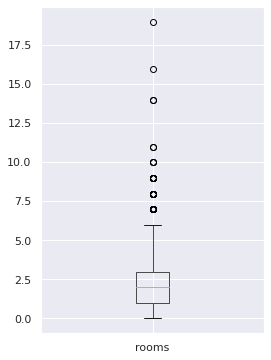

In [29]:
data.boxplot(column='rooms', grid=True, figsize=(4, 6)) # построим график разброса для столбйа rooms

В наше время квартиры, где больше 5 комнат практически не встречаются. Но так как выборка для квартир из СПб, то оставим число комнат до 10, отсальное отбросим. В СПб часто продают коммунальные квартиры, где большое количество комнат.

In [30]:
data = data.query('rooms <= 10').reset_index(drop=True)

Проанализируем столбец living_area на наличие выбросов.

In [31]:
# проверим
data.describe().T

,count,mean,std,min,25%,50%,75%,max
total_images,22182.0,9.967676e+00,5.704614e+00,0.0,6.0,10.00,14.00,50.0
last_price,22182.0,6.651613e+06,7.458390e+06,2000000.0,3600000.0,4800000.00,6990000.00,150000000.0
total_area,22182.0,6.113357e+01,3.408709e+01,12.0,40.8,53.10,71.00,500.0
rooms,22182.0,2.089352e+00,1.061240e+00,0.0,1.0,2.00,3.00,10.0
ceiling_height,22182.0,2.702734e+00,2.280864e-01,2.5,2.6,2.65,2.70,8.0
floors_total,22099.0,1.102973e+01,6.582275e+00,1.0,5.0,9.00,16.00,36.0
living_area,20503.0,3.477793e+01,2.137913e+01,2.0,19.0,30.30,43.00,347.5
floor,22182.0,6.072672e+00,4.949048e+00,1.0,2.0,5.00,8.00,33.0
kitchen_area,20156.0,1.073365e+01,5.846991e+00,1.3,7.2,9.50,12.00,107.0
balcony,22182.0,6.026508e-01,9.714783e-01,0.0,0.0,0.00,1.00,5.0


In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22182 entries, 0 to 22181
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          22182 non-null  int64         
 1   last_price            22182 non-null  int64         
 2   total_area            22182 non-null  float64       
 3   first_day_exposition  22182 non-null  datetime64[ns]
 4   rooms                 22182 non-null  int64         
 5   ceiling_height        22182 non-null  float64       
 6   floors_total          22099 non-null  float64       
 7   living_area           20503 non-null  float64       
 8   floor                 22182 non-null  int64         
 9   is_apartment          22182 non-null  boolean       
 10  studio                22182 non-null  bool          
 11  open_plan             22182 non-null  bool          
 12  kitchen_area          20156 non-null  float64       
 13  balcony         

#### Вывод
Произвелась предобработка данных. Были выполнены следующие действия:
- изменение типов данных,
- приведение имен столбцов к единому стилю,
- обработка явных и неявных дубликатов,
- обработка пропусков.

### Посчитайте и добавьте в таблицу новые столбцы

Добавим в наш датафрейм следующие столбы, необходимые для дальнейшего анализ:
- price_per_square_meter - цена за квадратный метр
- exposition_month - месяц публикации
- exposition_year - год публикации
- exposition_weekday - день недели публикации объявления (0 — понедельник, 1 — вторник и так далее)
- floor_category - категория этажа: первый, другое, последний
- city_centers_nearest_km - расстояние до центра города в километрах 

In [33]:
data['price_per_square_meter'] = data['last_price'] / data['total_area'] # Добавим столбец с ценой за 1м²

In [34]:
data['exposition_month'] = data['first_day_exposition'].dt.month # # Добавим столбец с месяцем публикации объявления
data['exposition_year'] = data['first_day_exposition'].dt.year # Добавим столбец с годом публикации объявления
data['exposition_weekday'] = data['first_day_exposition'].dt.weekday # Добавим столбец с днем недели публикации объявления

Далее категоризируем этажи и добавим столбец floor_category

In [35]:
# Функция для категоризации этажа 
def floor_cat(row):
    floor = row['floor']
    floors_total = row['floors_total']
    if floor == 1:
        return 'первый'
    elif floor == floors_total:
        return 'последний'
    else:
        return 'другое'

In [36]:
data['floor_category'] = data.apply(floor_cat, axis=1) # применим функцию и добавим новый столбец

In [37]:
data['city_centers_nearest_km'] = round(data['city_centers_nearest'] / 1000) # добавим столбец с расстоянием до центра в км и округлим 

In [38]:
# проверим новые столбцы
data.head(30)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,price_per_square_meter,exposition_month,exposition_year,exposition_weekday,floor_category,city_centers_nearest_km
0,20,13000000,108.00,2019-03-07,3,2.70,16.0,51.00,8,False,False,False,25.00,0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,120370.370370,3,2019,3,другое,16.0
1,7,3350000,40.40,2018-12-04,1,2.65,11.0,18.60,1,False,False,False,11.00,2,поселок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,82920.792079,12,2018,1,первый,19.0
2,10,5196000,56.00,2015-08-20,2,2.65,5.0,34.30,4,False,False,False,8.30,0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,92785.714286,8,2015,3,другое,14.0
3,0,64900000,159.00,2015-07-24,3,2.65,14.0,NaN,9,False,False,False,NaN,0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,408176.100629,7,2015,4,другое,7.0
4,2,10000000,100.00,2018-06-19,2,3.03,14.0,32.00,13,False,False,False,41.00,0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,100000.000000,6,2018,1,другое,8.0
5,10,2890000,30.40,2018-09-10,1,2.65,12.0,14.40,5,False,False,False,9.10,0,городской поселок Янино-1,NaN,13098.5,NaN,NaN,NaN,NaN,55.0,95065.789474,9,2018,0,другое,13.0
6,6,3700000,37.30,2017-11-02,1,2.65,26.0,10.60,6,False,False,False,14.40,1,поселок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0,99195.710456,11,2017,3,другое,19.0
7,5,7915000,71.60,2019-04-18,2,2.65,24.0,NaN,22,False,False,False,18.90,2,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN,110544.692737,4,2019,3,другое,12.0
8,20,2900000,33.16,2018-05-23,1,2.65,27.0,15.43,26,False,False,False,8.81,0,поселок Мурино,NaN,13098.5,NaN,NaN,NaN,NaN,189.0,87454.764777,5,2018,2,другое,13.0
9,18,5400000,61.00,2017-02-26,3,2.50,9.0,43.60,7,False,False,False,6.50,2,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0,88524.590164,2,2017,6,другое,15.0


#### Вывод
Добавили необходимые для дальнейшего исследования столбцы. Важно отметить, что при категоризации этажа в доме строках с пропусками категория "Другое". Это не должно повлиять на дальнейшее исследование. 

### Проведите исследовательский анализ данных

#### Изучение параметров

##### Для начала изучим общую площадь.

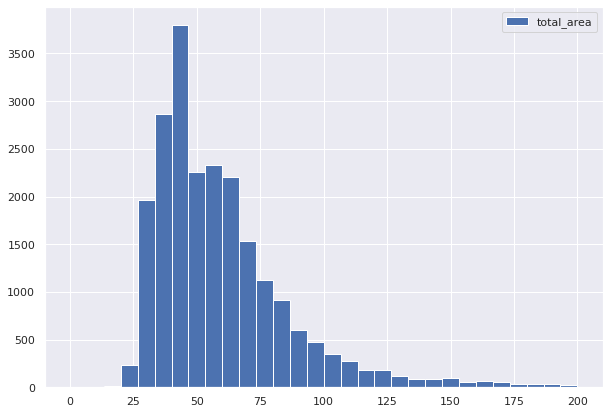

In [39]:
data['total_area'].hist(bins=30, range=(0,200),legend='total_area')
plt.show()

Площадь большей части продаваемых квартир находится в диапазоне от 30 до 60 квадратных метров.

##### Изучим данные по жилой площади

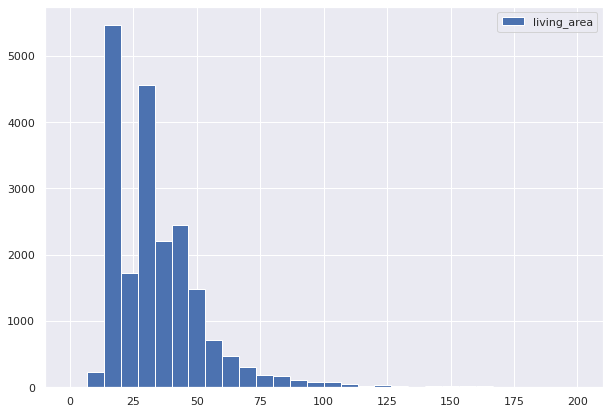

In [40]:
data['living_area'].hist(bins=30, range=(0,200),legend='living_area')
plt.show()

Большинство квартир имеют жилую площадь в диапазон от 15 до 45, что и логично, учитывая, что большинство квартир имею общую площадь от 30 до 60. К тому же присутстют объекты с жилой площадью менее 10 кв м. Не удивительно, ведь в СПб очень много маленьких студий.

##### Площадь кухни

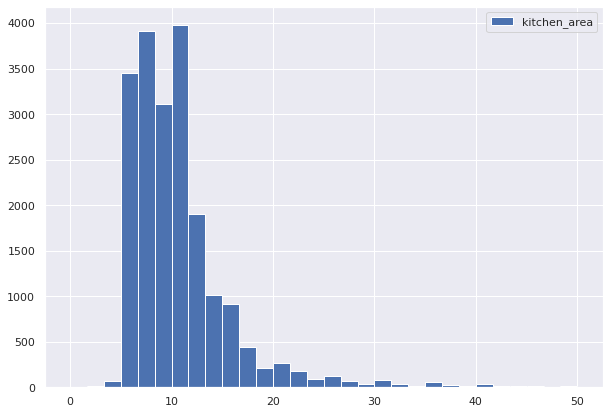

In [41]:
data['kitchen_area'].hist(bins=30, range=(0,50),legend='kitchen_area')
plt.show()

Большинство квартир имеют площадь кухни в диапазоне от 5 до 18 кв м. В свою очередь присутствуют и кухни совсем маленькие (менее 5) и большие (больше 30).

##### Стоимость квартиры

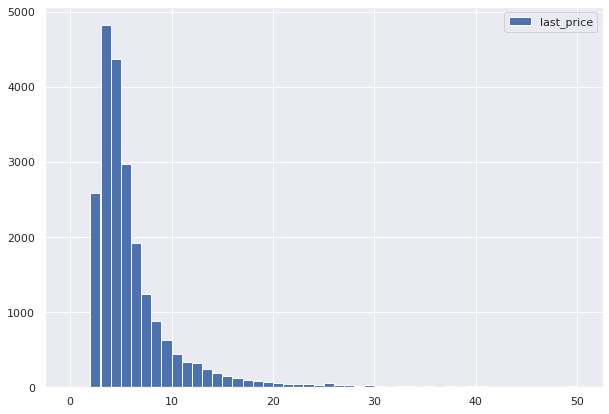

In [42]:
data.last_price = data.last_price / 1000000
data['last_price'].hist(bins=50, range=(0, 50), legend='last_price')
plt.show()

Основная часть квартир продается по цене 2,5-7 млн. Также есть объекты и с более высокой ценой. Вероятнее всего, это связано с классом жилья (бизнес, элитный).

##### Количество комнат

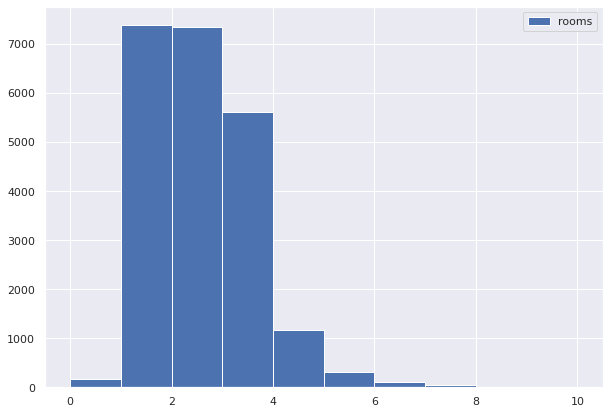

In [43]:
data['rooms'].hist(bins=10, range=(0,10),legend='rooms')
plt.show()

Однокомнатные и двухкомнатные квартиры являются наиболее часто продаваемыми. Это логично, ведь квартир с большим количество комнат намного меньше.

##### Высота потолков

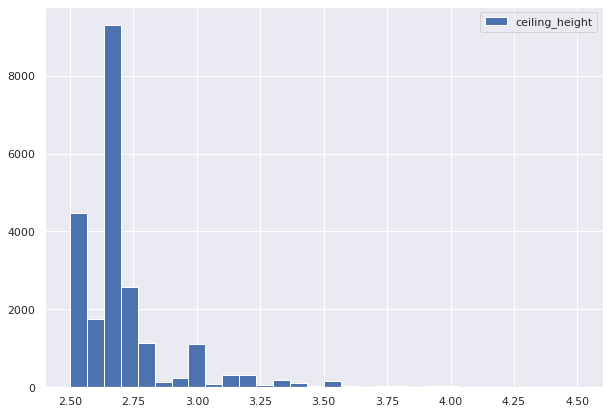

In [44]:
data['ceiling_height'].hist(bins=30, range=(2.5,4.5),legend='ceiling_height')
plt.show()

Большая часть квартир имеет потолок выотой 2.6 метра, что соответствует действительности, ведь в российских городах много "хрущевок", в которых именно такая высота потолков. Также присутствуют квартиры с выотой потолков выше 3 м, что тоже не удивляет, так как в СПб много старых домов, где делали высокие потолки. 

##### Этаж квартиры

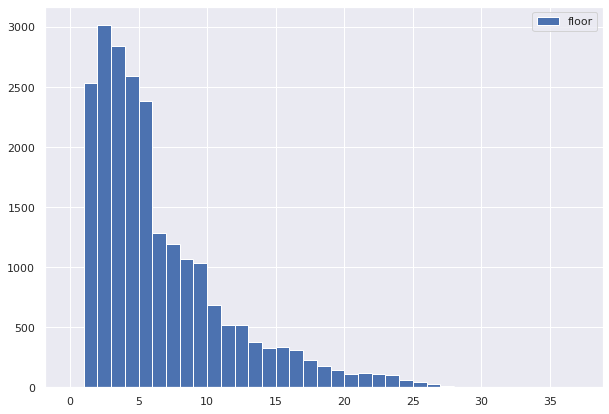

In [45]:
data['floor'].hist(bins=37, range=(0,37),legend='floor')
plt.show()

Основная часть квартир находится не выше 10 этажа, что соответствует реальности, ведь в СПб много домов советских времен.

##### Категория этажа

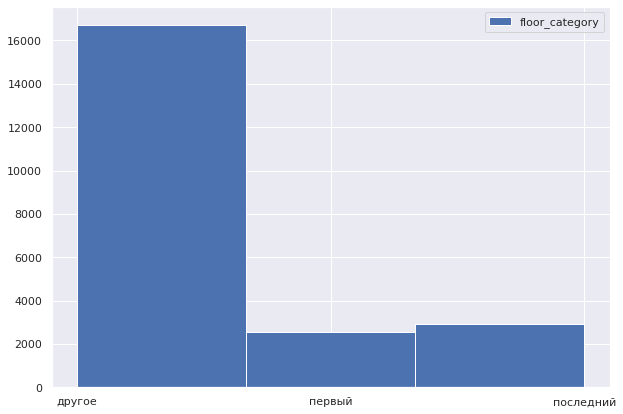

In [46]:
data['floor_category'].hist(bins=3,legend='floor_category')
plt.show()

Большинство проданных квартир находится не на первом и не на последнем этажах.

##### Этажность дома

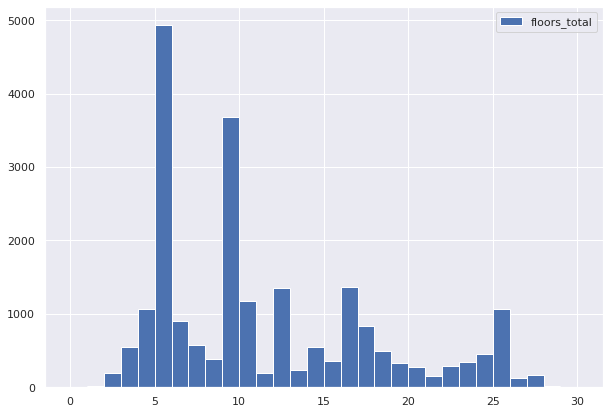

In [47]:
data['floors_total'].hist(bins=30,range=(0,30),legend='floors_total')
plt.show()

Большая часть квартир продавалась в 5 и 9 этажных домах. Таких домов в целом больше по городу.

##### Расстояние до центра в метрах

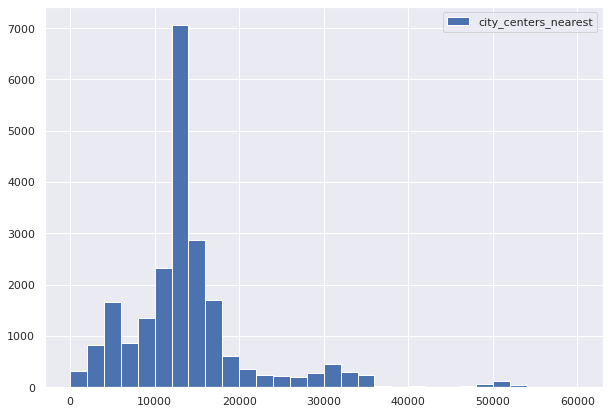

In [48]:
data['city_centers_nearest'].hist(bins=30, range=(0,60000), legend='city_centers_nearest')
plt.show()

Большинство проданных квартир находятся в диапазоне от 12 до 16 км от центра города. На окраинах квартиры продают чаще.

##### Расстояние до аэропорта

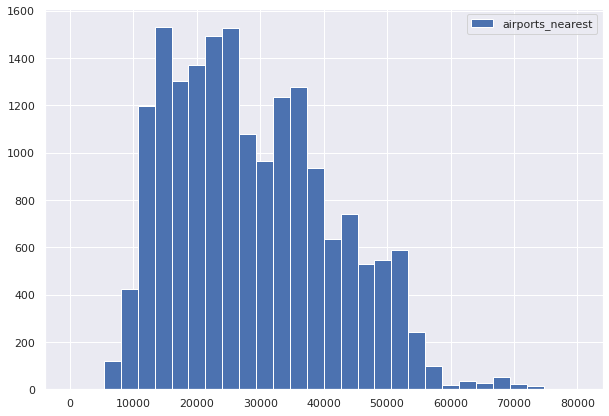

In [49]:
data['airports_nearest'].hist(bins=30, range=(0,80000), legend='airports_nearest')
plt.show()

Большая часть находится на расстоянии 10-27 км от аэропорта.

##### Расстояние до парка

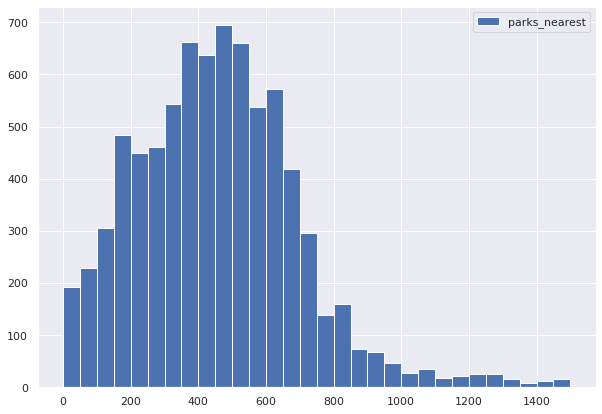

In [50]:
data['parks_nearest'].hist(bins=30, range=(0,1500),legend='parks_nearest')
plt.show()

Нааиболее часто парк находится в районе 350-650 метров от дома. 

##### День и месяц публикации

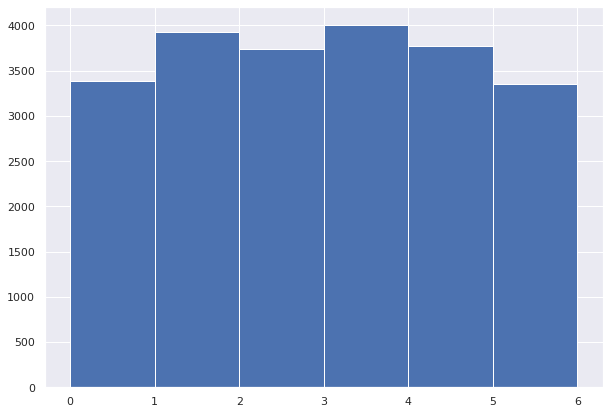

In [51]:
data['exposition_weekday'].hist(bins=6) # данные по дню публикации
plt.show()

Квартиры выставлялись на продажу равномерно в течение всей недели. Резких пиков не наблюдается.

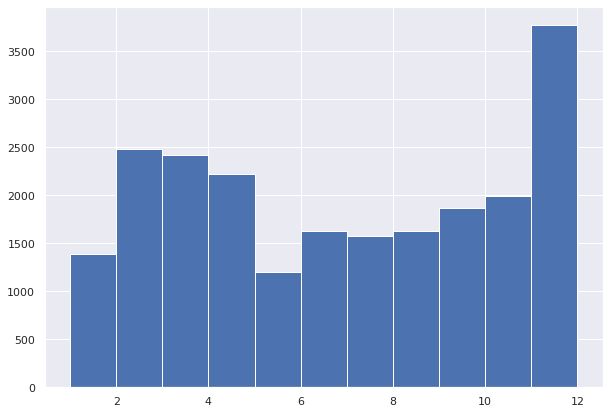

In [52]:
data['exposition_month'].hist(bins=11) # данные по месяцам
plt.show()

Чаще всего квартиры выставлялись на продажу в декабре. Также есть пик в области 2-3 месяцев (конец зимы-начало весны). Летом продажи падают, скорее всего в связи с отпусками.

##### Вывод
Проанализоровав параметры, можно сделать вывод о том, какая квартира наиболее часто продавалась: 1-2 комнатная квартира в 5-этажном доме, не на первом и не на последнем этажах, общей площадью около 45 кв м, с жилой площадью 15-20 кв м и площадью кухни около 10 кв м, с высотой потолков 2.5 м, стоимость которой в районе 3-6 млн.руб. и которая удалена от центра на 12-16 км, от парка на 300-600 м и от аэропорта на 27 км. Чаще всего квартиры выставляют на продажи в январе.

#### Скорость продажи квартир

Для начала построим гистограмму для столбца days_exposition, а также вычислим среднее и медиану.

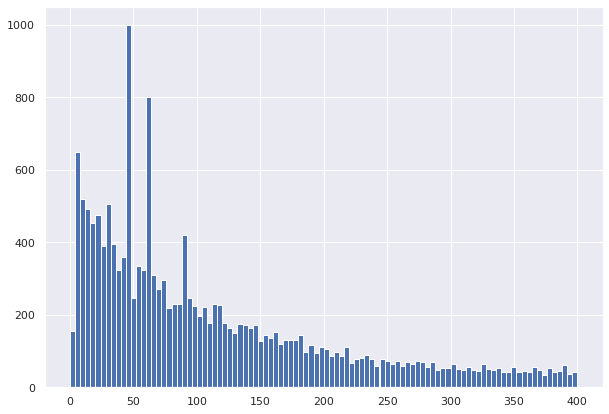

In [53]:
data['days_exposition'].hist(bins=100, range=(0, 400))
plt.show()

In [54]:
data['days_exposition'].value_counts().head(10) # изучим наиболее часто встречающиеся значения

45.0    722
60.0    534
7.0     218
30.0    202
90.0    200
4.0     167
3.0     152
5.0     146
14.0    143
9.0     133
Name: days_exposition, dtype: int64

Чаще всего квартиры продают на 45 и 60 дни.

In [55]:
display(data['days_exposition'].median()) # рассчитаем медиану
display(data['days_exposition'].mean()) # рассчитаем среднее

95.0

181.1390676910299

Медианное значение почти в два раза меньше среднего. Построим график размаха.

<AxesSubplot:>

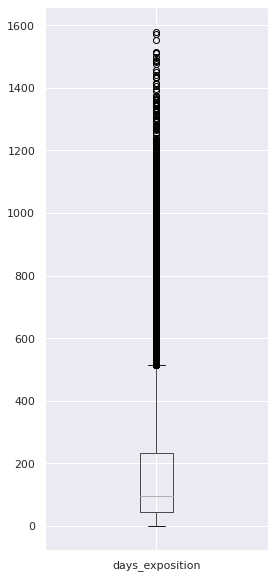

In [56]:
data.boxplot(column='days_exposition', grid=True, figsize=(4, 10)) # построим график размаха

##### Вывод

 В среднем квартира в СПб продается около 190 дней. Продажа до одного месяца будет считаться быстрой, а в диапазоне от 250 до 550 дней - долгой. Также есть квартиры, которые были в продаже по несколько лет. Думаю, это забытые или не снятые с продажи объявления. Их можно удалить.

In [57]:
data = data.query('days_exposition < 550') # отбрасываем строки с выбросами

#### Факторы, влияющие на полную стоимость квартиры

In [58]:
# Создадим список с параметрами для проверки
corr_param = [
    'last_price',
    'total_area',
    'rooms'
]

# построим матрицу корреляции
corr_labels = [
    'стоимость квартиры',
    'общая площадь квартиры',
    'количество комнат',
    'расстояние\nдо центра города',
]

corr_matrix = data[corr_param].corr()
display(corr_matrix)

,last_price,total_area,rooms
last_price,1.000000,0.731540,0.432837
total_area,0.731540,1.000000,0.758166
rooms,0.432837,0.758166,1.000000


Изучим подробнее данные параметры.

##### Цена и общая площадь

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='total_area', ylabel='last_price'>

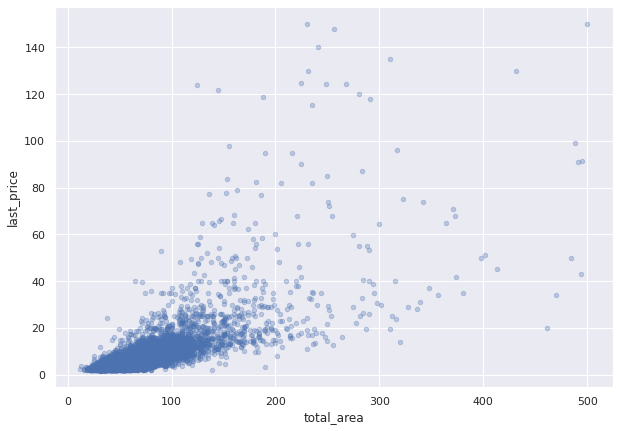

In [59]:
# построим диаграмму рассеивания
data.plot(x='total_area', y='last_price', kind='scatter', alpha = 0.3) 

In [60]:
# посчитаем коэффициент корреляции Пирсона
round(data['total_area'].corr(data['last_price']), 2)

0.73

Чем больше площадь квартиры, тем больше стоимость, это и логично.

#####  Стоимость и жилая площадь

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='living_area', ylabel='last_price'>

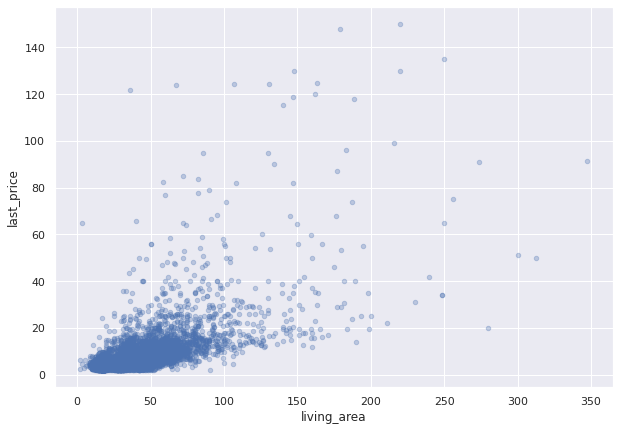

In [61]:
# построим диаграмму рассеивания
data.plot(x='living_area', y='last_price', kind='scatter', alpha = 0.3) 

In [62]:
# посчитаем коэффициент корреляции Пирсона
round(data['living_area'].corr(data['last_price']), 2)

0.65

Зависимость также присутствует. При увелечении жилой площади стоимость растет, только коэффициент по сравнению с первым параметром немного ниже.

##### Стоимость и площадь кухни

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='kitchen_area', ylabel='last_price'>

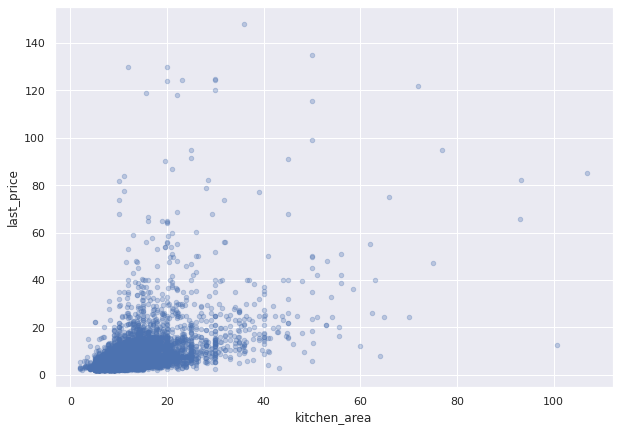

In [63]:
# построим диаграмму рассеивания
data.plot(x='kitchen_area', y='last_price', kind='scatter', alpha = 0.3) 

In [64]:
# посчитаем коэффициент корреляции Пирсона
round(data['kitchen_area'].corr(data['last_price']), 2)

0.55

При увеличении площадии кухни цена также растет, но коэффициент еще ниже.

##### Количество комнат и стоимость

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='rooms', ylabel='last_price'>

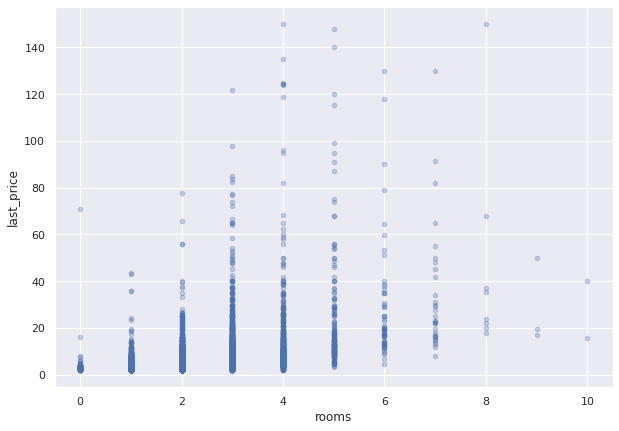

In [65]:
# построим диаграмму рассеивания
data.plot(x='rooms', y='last_price', kind='scatter', alpha = 0.3) 

In [66]:
# посчитаем коэффициент корреляции Пирсона
round(data['rooms'].corr(data['last_price']), 2)

0.43

В данном параметре присутствует большой разброс цен, но зависмость есть: чем больше комнат, тем больше и цена. Коэффициент ниже, чем у предыдущих параметров.

##### Стоимость и класс этажа

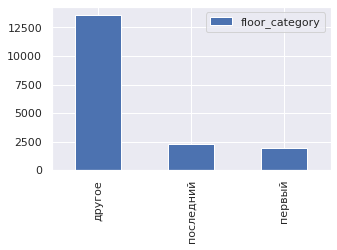

In [67]:
# построим график
data['floor_category'].value_counts().plot.bar(figsize=(5, 3), legend=True)
plt.show()

Самая низкая цена у квартир на первом этаже, самая высокая у категории "другое".

##### Стоимость и дата размещения

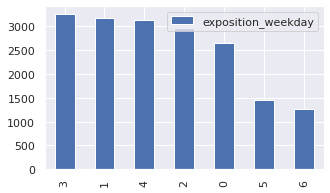

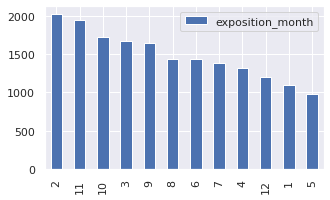

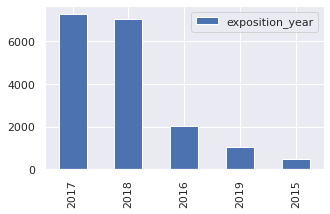

In [68]:
# построи диаграммы рассеивания для дня, месяца и года

data['exposition_weekday'].value_counts().plot.bar(figsize=(5, 3), legend=True)
plt.show()

data['exposition_month'].value_counts().plot.bar(figsize=(5, 3), legend=True)
plt.show()

data['exposition_year'].value_counts().plot.bar(figsize=(5, 3), legend=True)
plt.show()

Как таковой зависимость между датой размещения и стоимостью нет. Можно лишь отметить, что до 2017 года стоимость росла, а затем пошла вниз. Также стоимость падает в летнее время, вероятнее всего в связи с отпусками.

#### Средняя цена 1 кв м в 10 населенных пунктах

In [69]:
# найдем населенные пункты с большим числом объявлений
top_10 = data['locality_name'].value_counts().head(10)
top_10

Санкт-Петербург      12541
поселок Мурино         511
Кудрово                411
поселок Шушары         388
Колпино                294
Всеволожск             294
поселок Парголово      286
Пушкин                 278
Гатчина                232
Выборг                 161
Name: locality_name, dtype: int64

In [70]:
# выведем среднюю цену за 1 кв м в топ 10 
top_10_pivot = data.query('locality_name in @top_10.index').pivot_table(index='locality_name', values='price_per_square_meter')
top_10_pivot.sort_values(by='price_per_square_meter', ascending=False)

,price_per_square_meter
locality_name,
Санкт-Петербург,111219.737597
Пушкин,101855.537019
Кудрово,94623.986121
поселок Парголово,89560.381422
поселок Мурино,86216.772606
поселок Шушары,78036.913346
Колпино,74792.137225
Гатчина,69619.207799
Всеволожск,69441.970202


##### Вывод
Максимальная стоимость в Санкт-Петербурге, что и логично.

Минимальная - в Выборге, вероятно, в связи с удаленностью от Петербурга.

#### Стоимость каждого км в СПб

In [71]:
price_km_to_center = data.query('locality_name == "Санкт-Петербург"').pivot_table(index='city_centers_nearest_km', values='price_per_square_meter')
price_km_to_center

,price_per_square_meter
city_centers_nearest_km,
0.0,171793.935402
1.0,148940.752016
2.0,152820.023384
3.0,115589.024302
4.0,129598.540819
5.0,136664.604900
6.0,145859.855954
7.0,147004.031411
8.0,121780.147665


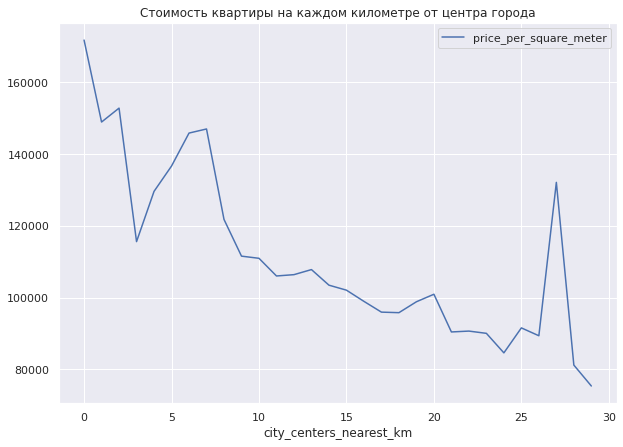

In [72]:
# построим график для наглядности
price_km_to_center.plot(grid=True, title = 'Cтоимость квартиры на каждом километре от центра города')
plt.show()

##### Вывод
Стоимость квадратного метра по мере удаления от центра уменьшается. Есть провал примерно на 3 км, возможно там какой-то промышленный район. Также есть пик на расстоянии примерно 27 км, возможно это связяна с классом жилья (бизнес, элитный). 

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b>
<br>Верно 👍
</div>

### Общий вывод

Были проанализировали данные сервиса Яндекс.Недвижимость о продаже квартир в Санкт-Петербурге.
Была произведена предобработка данных, где произвелась работа над пропусками, дубликатами и аномальными значениями.
Далее провели исследовательский анализ данных.

При изучении параметры объектов недвижимости были сделаны следующие выводы:
- чаще продают 1-2 комнатные квартиры
- чаще продают квартиры не на первом и не на последнем этажах
- чаще всего дом имеет 5 или 9 этажей
- большинство проданных квартир имеют жилую площадь в районе 10-30 кв м, а площадь кухни в районе 5-15 кв м
- стоимость большинства квартир варьируется в диапазоне 3-7 млн рублей
- высота потолков в большинстве случаев равна 2.6 м
- чаще продаются квартиры на окраинах города (на удалении примерно 12-16 км от центра)
- в большинстве случаев в радиусе 350-600 метров от квартиры есть парк

Также были сделаны выводы о сроке продажи квартиры:
- средняя длительность продажи квартиры составляет 30-250 дней
- меньше 30 - быстрая продажа, больше 250 - долгая


Были изучены параметры, влияющие на стоимость квартиры:
- самая большая связь между площадью жилья и стоимостью: чем больше, тем дороже
- площадь кухни и жилая площадь также имеют прямопропорциональную зависимость
- также было выявлено, что, чем ближе квартира к центру, тем она дороже. Но за исключением отдельных объектов, находящихся в элитных частях города или промышленных районах

Была рассчитана стоимость 1 кв м в 10 самых популярных населенных пунктах:
- самая высокая стоимость кв м в Санкт-Петербурге - около 111000 руб
- самая низкая стоимость кв м в Выборге - около 58500 руб
Думаю, что стоимость кв м в населенных пунктах исходит от удаленности от СПб, наличия исторических памятников и транспортной доступности.